# 📊 Student Performance Analyzer
##### Welcome to the Student Performance Analyzer!
##### This notebook explores how different factors (like gender, parental education, lunch type, etc.) influence student performance in reading, writing, and math.

##### We'll be using Pandas, Matplotlib, and Seaborn to visualize and analyze the dataset.

In [1]:
# 📦 Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
# 📥 Load the Dataset
# Reading the CSV file into a pandas DataFrame
df = pd.read_csv("C:\\Users\\nihar\\OneDrive\\Desktop\\jupyter projects\\Expanded_data_with_more_features.csv")
df.head(10)


,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
5,5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79
6,6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89
7,7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39
8,8,male,group D,high school,free/reduced,completed,single,sometimes,no,3.0,private,> 10,65,64,68
9,9,female,group B,high school,free/reduced,none,married,regularly,yes,NaN,private,< 5,37,59,50


# ❓ What does the dataset look like?
##### Let's view the first few records to understand what kind of information we have.

In [3]:
# 📈 Summary statistics
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [4]:
# ℹ️ Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [5]:
# ❓ Are there any missing values?
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [6]:
# ➕ Add a new column to calculate average score
df["average_score"] = df[["MathScore", "ReadingScore", "WritingScore"]].mean(axis=1)
df.head()


,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,average_score
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74,72.000000
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88,82.333333
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,90.333333
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42,47.666667
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,76.333333


# Drop unnamed column

In [7]:
# 🧹 Drop unnecessary columns
# Removing index column that was saved in the CSV file
# Change axis=0 (which means row) to axis=1 (which means column):


df = df.drop("Unnamed: 0", axis=1)
df.head()

# becausee theree is no usee of unnamed column...

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,average_score
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74,72.000000
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88,82.333333
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,90.333333
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42,47.666667
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,76.333333


# Gender Distribution

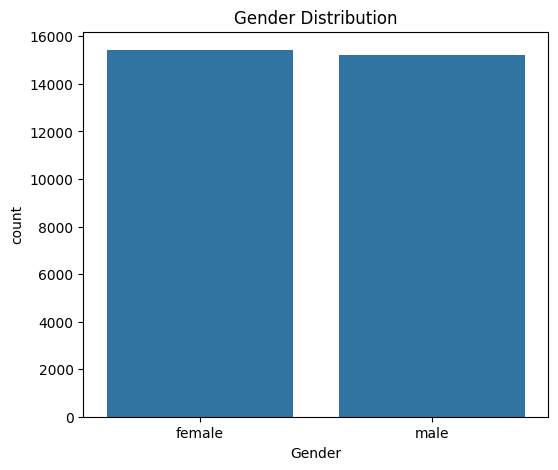

In [8]:

plt.figure(figsize=(6,5))
ax=sns.countplot(data=df,x="Gender")
plt.title("Gender Distribution")
plt.show()

In [13]:
# from the above chart we have analyzed that:
# the number of females in the data is more than the number of males!

# 🧠 Do boys or girls perform better on average?


C:\Users\nihar\AppData\Local\Temp\ipykernel_10048\4293631246.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Gender", y="average_score", palette="pastel")


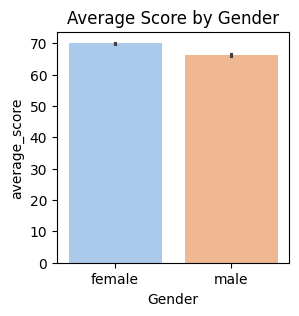

In [9]:
# Compare average scores by gender
plt.figure(figsize=(3,3))
sns.barplot(data=df, x="Gender", y="average_score", palette="pastel")
plt.title("Average Score by Gender")
plt.show()


# 🧑‍🎓 Does parental education affect student performance?

In [10]:
gd = df.groupby("ParentEduc").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
gd

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


# Graph repersentation

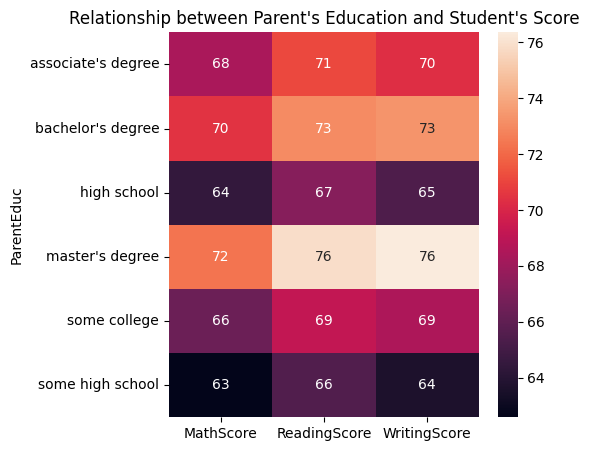

In [11]:
plt.figure(figsize=(5,5))
sns.heatmap(gd,annot=True)
plt.title("Relationship between Parent's Education and Student's Score")
plt.show()


# darker the valueeess scoree is alsooo lowww 
# lightt valuess scoree is highh...

In [10]:
# from the above chart we have concluded that the eduation of the parents have a good impacts on their scoress...

# 🧑‍🎓 Impact of Parent Marital Status on child's Score 

In [12]:
gd1 = df.groupby("ParentMaritalStatus").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
gd1

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
divorced,66.691197,69.655011,68.799146
married,66.657326,69.389575,68.420981
single,66.165704,69.157250,68.174440
widowed,67.368866,69.651438,68.563452


# Graph repersentation

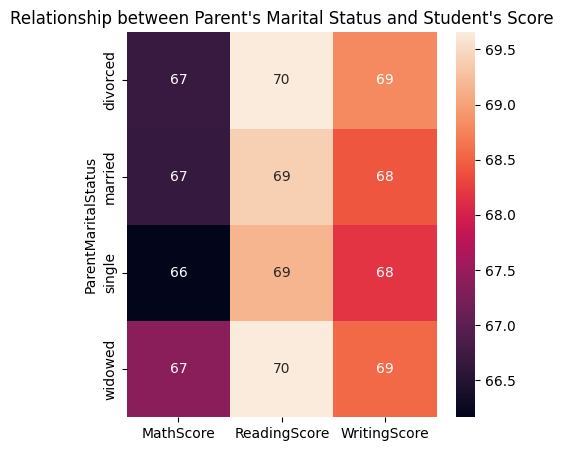

In [13]:
plt.figure(figsize=(5,5))
sns.heatmap(gd1,annot=True)
plt.title("Relationship between Parent's Marital Status and Student's Score")
plt.show()


# darker the valueeess scoree is alsooo lowww 
# lightt valuess scoree is highh...

In [17]:
# from the above graph we have analyze that ParentMaritalStatus have neglibe impact on child's education

# 🔥 Which subjects are most correlated with each other?

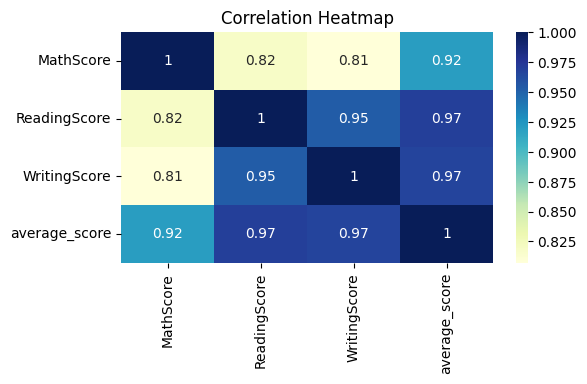

In [14]:
# Correlation matrix
plt.figure(figsize=(6, 3))
sns.heatmap(df[["MathScore", "ReadingScore", "WritingScore", "average_score"]].corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()


# 🏆 Who are the top and bottom performers?

In [52]:
# Top 5
print("Top 5 Students:")
display(df.sort_values("average_score", ascending=False).head())

print("\nBottom 5 Students:")
display(df.sort_values("average_score", ascending=True).head())


Top 5 Students:


,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,average_score
30605,female,group E,master's degree,standard,NaN,married,sometimes,no,2.0,school_bus,5 - 10,100,100,100,100.0
30060,female,group D,bachelor's degree,standard,completed,married,regularly,no,1.0,school_bus,5 - 10,100,100,100,100.0
3460,male,group E,bachelor's degree,free/reduced,completed,divorced,sometimes,yes,0.0,school_bus,> 10,100,100,100,100.0
2683,male,group D,associate's degree,standard,completed,married,regularly,no,1.0,NaN,> 10,100,100,100,100.0
23353,male,group E,associate's degree,standard,completed,married,sometimes,no,3.0,private,> 10,100,100,100,100.0



Bottom 5 Students:


,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,average_score
55,female,group C,some high school,free/reduced,none,single,regularly,yes,3.0,school_bus,> 10,0,17,10,9.000000
14494,male,group D,high school,free/reduced,none,divorced,sometimes,yes,2.0,school_bus,< 5,7,11,12,10.000000
18385,male,group B,high school,free/reduced,none,single,never,no,NaN,school_bus,5 - 10,10,12,9,10.333333
4719,male,group B,some college,free/reduced,none,single,never,yes,NaN,school_bus,NaN,19,11,6,12.000000
30389,male,group B,associate's degree,free/reduced,none,divorced,never,no,1.0,school_bus,5 - 10,24,14,4,14.000000


# Box Plot--->> to detect outliers..

In [ ]:
# boxplot to detect outlierss

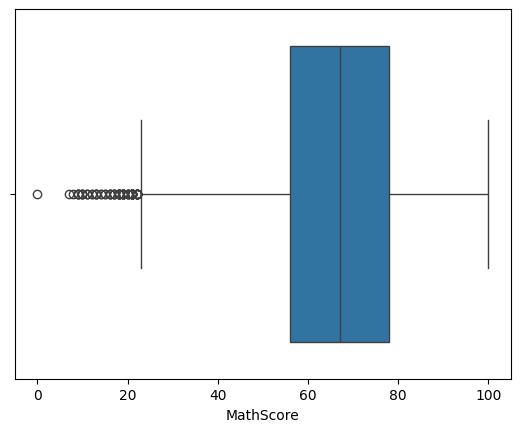

In [23]:

sns.boxplot(data = df, x = "MathScore")
plt.show()


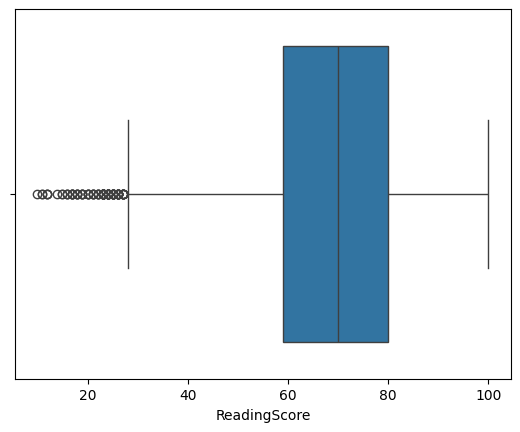

In [25]:

sns.boxplot(data = df, x = "ReadingScore")
plt.show()


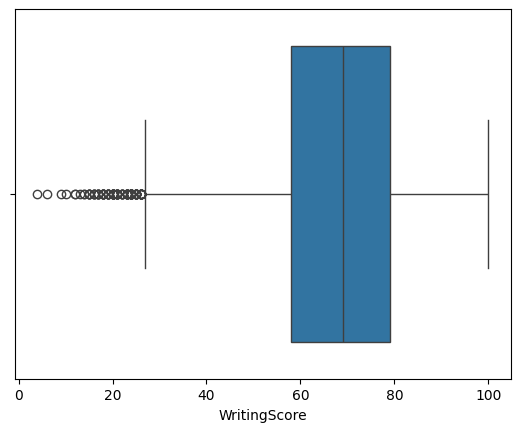

In [27]:

sns.boxplot(data = df, x = "WritingScore")
plt.show()


In [28]:
# from above box plot we have analyze that math is comaparitively difficult subject than  writing and reading..
# wee see outlinerr in math is 0 ...
# anyy other subject does not have 0 marks..


In [29]:

print(df["EthnicGroup"].unique())


[nan 'group C' 'group B' 'group A' 'group D' 'group E']


# Distribution of Ethnic Groups

# Using Pie Chart

[np.int64(2219), np.int64(5826), np.int64(9212), np.int64(7503), np.int64(4041)]


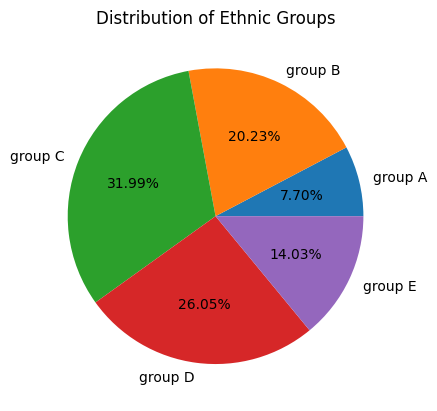

In [35]:

groupA = df.loc[(df['EthnicGroup'] == "group A")].count()
groupB = df.loc[(df['EthnicGroup'] == "group B")].count()
groupC = df.loc[(df['EthnicGroup'] == "group C")].count()
groupD = df.loc[(df['EthnicGroup'] == "group D")].count()
groupE = df.loc[(df['EthnicGroup'] == "group E")].count()



l = ["group A", "group B", "group C", "group D", "group E"]
mlist = [groupA["EthnicGroup"], groupB["EthnicGroup"], groupC["EthnicGroup"], groupD["EthnicGroup"], groupE["EthnicGroup"]]

print(mlist)   # to print the values above...

plt.pie(mlist, labels = l, autopct = "%1.2f%%")
# autopct = "%1.2f%%"----->>>to show percentage in it
plt.title("Distribution of Ethnic Groups")
plt.show()


[Text(0, 0, '9212'),
 Text(0, 0, '5826'),
 Text(0, 0, '2219'),
 Text(0, 0, '7503'),
 Text(0, 0, '4041')]

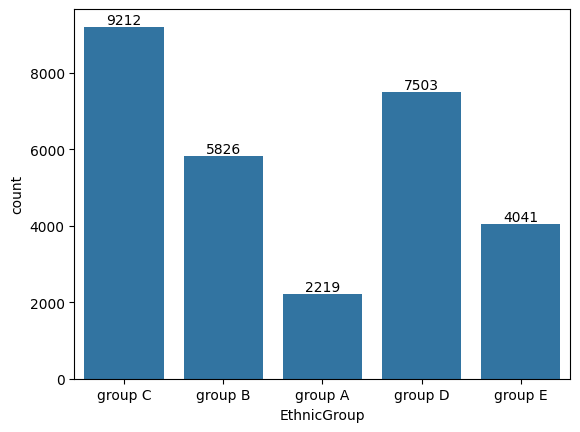

In [34]:
ax = sns.countplot(data = df, x = "EthnicGroup")
ax.bar_label(ax.containers[0])